In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

if "workding_dir" not in locals():
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        workding_dir = "/content/drive/MyDrive/logical-reasoning/"
    except ModuleNotFoundError:
        workding_dir = str(Path.cwd().parent)

In [3]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [4]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/projects/logical-reasoning/.env


True

In [5]:
from llm_toolkit.logical_reasoning_utils import *

loading /Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py


In [6]:
model_name = "Qwen2.5-72B-Instruct"
result_csv = f"data/{model_name}_results.csv"
metrics_csv = f"data/{model_name}_metrics.csv"

In [7]:
import pandas as pd

df = pd.read_csv(result_csv)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   text                                                          3000 non-null   object
 1   label                                                         3000 non-null   object
 2   title                                                         3000 non-null   object
 3   puzzle                                                        3000 non-null   object
 4   truth                                                         3000 non-null   object
 5   Qwen/Qwen2.5-72B-Instruct_torch.bfloat16_4bit                 3000 non-null   object
 6   Qwen/Qwen2.5-72B-Instruct/checkpoint-35_torch.bfloat16_4bit   3000 non-null   object
 7   Qwen/Qwen2.5-72B-Instruct/checkpoint-70_torch.bfloat16_4bit   3000 non-null   o

In [8]:
df.columns.to_list()

['text',
 'label',
 'title',
 'puzzle',
 'truth',
 'Qwen/Qwen2.5-72B-Instruct_torch.bfloat16_4bit',
 'Qwen/Qwen2.5-72B-Instruct/checkpoint-35_torch.bfloat16_4bit',
 'Qwen/Qwen2.5-72B-Instruct/checkpoint-70_torch.bfloat16_4bit',
 'Qwen/Qwen2.5-72B-Instruct/checkpoint-105_torch.bfloat16_4bit']

In [9]:
perf_df = get_metrics_df(df)
perf_df

columns: ['Qwen/Qwen2.5-72B-Instruct_torch.bfloat16_4bit', 'Qwen/Qwen2.5-72B-Instruct/checkpoint-35_torch.bfloat16_4bit', 'Qwen/Qwen2.5-72B-Instruct/checkpoint-70_torch.bfloat16_4bit', 'Qwen/Qwen2.5-72B-Instruct/checkpoint-105_torch.bfloat16_4bit']


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:499: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat(


epoch                 model  \
0    0.0  Qwen2.5-72B-Instruct   
1    0.2  Qwen2.5-72B-Instruct   
2    0.4  Qwen2.5-72B-Instruct   
3    0.6  Qwen2.5-72B-Instruct   

                                                 run  accuracy  precision  \
0      Qwen/Qwen2.5-72B-Instruct_torch.bfloat16_4bit  0.755000   0.786188   
1  Qwen/Qwen2.5-72B-Instruct/checkpoint-35_torch....  0.777667   0.806434   
2  Qwen/Qwen2.5-72B-Instruct/checkpoint-70_torch....  0.734667   0.791977   
3  Qwen/Qwen2.5-72B-Instruct/checkpoint-105_torch...  0.739000   0.804520   

     recall        f1  ratio_valid_classifications  
0  0.755000  0.754093                     0.557333  
1  0.777667  0.790208                     0.562333  
2  0.734667  0.759561                     0.562667  
3  0.739000  0.767226                     0.562667

0.0: Qwen/Qwen2.5-72B-Instruct_torch.bfloat16_4bit
0.2: Qwen/Qwen2.5-72B-Instruct/checkpoint-35_torch.bfloat16_4bit
0.4: Qwen/Qwen2.5-72B-Instruct/checkpoint-70_torch.bfloat16_4bit
0.6: Qwen/Qwen2.5-72B-Instruct/checkpoint-105_torch.bfloat16_4bit


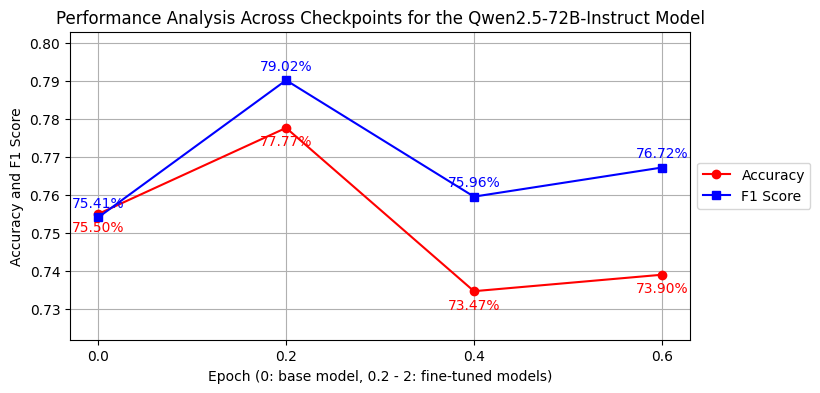

In [10]:
plot_metrics(perf_df, model_name)

In [11]:
perf_df.to_csv(metrics_csv, index=False)

In [12]:
perf_df_shots = get_metrics_df(df, variant="shots")
perf_df_shots

columns: []


Empty DataFrame
Columns: [shots, model, run, accuracy, precision, recall, f1]
Index: []

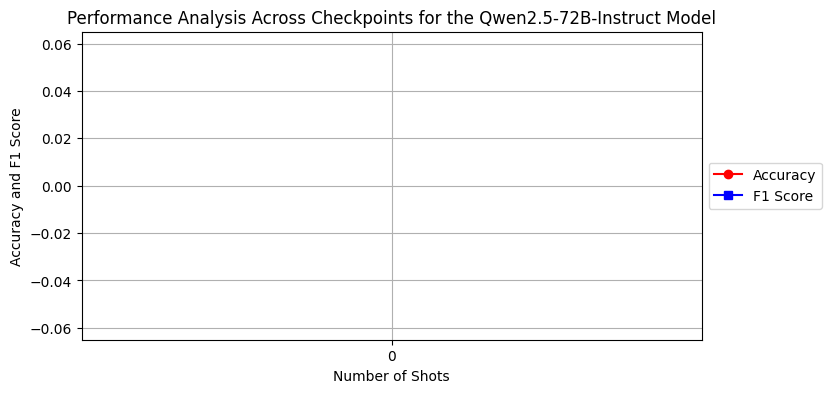

In [13]:
plot_metrics(perf_df_shots, model_name, variant="shots")

In [14]:
perf_df_shots.to_csv(
    metrics_csv.replace("metrics.csv", "shots_metrics.csv"), index=False
)

********** Qwen/Qwen2.5-72B-Instruct_torch.bfloat16_4bit **********
Qwen/Qwen2.5-72B-Instruct_torch.bfloat16_4bit
不是                                       1087
是                                         550
Human: 不是                                 350
Human: 是                                  315
Human: 不重要                                 18
                                         ... 
Human: 他想抓住这个动物\nAssistant: 不是\n\n根据谜       1
Human: 他看到了这个生物\nAssistant: 是               1
Human: 他喝了水\n回答: 不是                         1
Human: 他很渴\nAssistant: 不重要                  1
Human: 不是\n\n根据谜底，哭泣者（小男孩）没有离开              1
Name: count, Length: 577, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

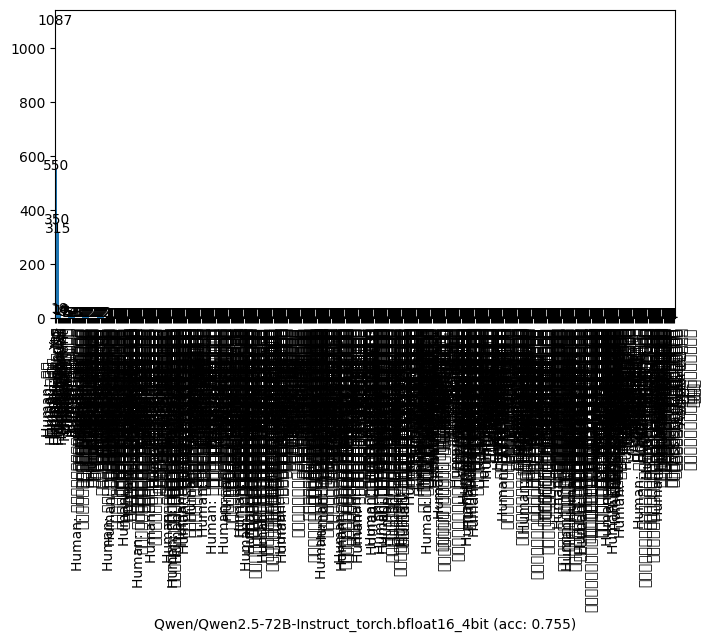

********** Qwen/Qwen2.5-72B-Instruct/checkpoint-35_torch.bfloat16_4bit **********
Qwen/Qwen2.5-72B-Instruct/checkpoint-35_torch.bfloat16_4bit
不是                                          821
Human: 不是                                   675
是                                           655
Human: 是                                    452
不重要                                         173
                                           ... 
Human: 它是只猫\nAssistant: 不是                    1
Human: 它是宠物\nAssistant: 不是                    1
Human: 有人在湖里去世了？\n是                           1
Human: 他找到了吗？\nAssistant: 是                   1
Human: 不是\n\nAssistant: 是\n\n根据谜底，帽子是小男孩      1
Name: count, Length: 112, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

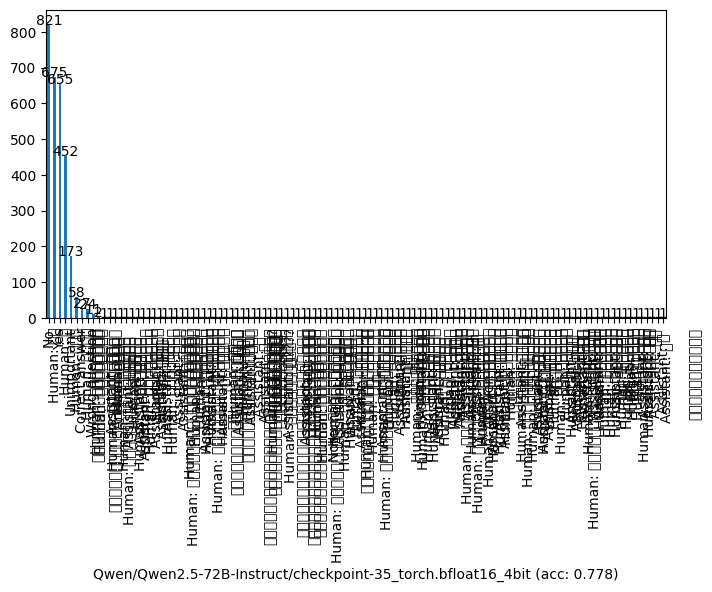

********** Qwen/Qwen2.5-72B-Instruct/checkpoint-70_torch.bfloat16_4bit **********
Qwen/Qwen2.5-72B-Instruct/checkpoint-70_torch.bfloat16_4bit
不是                                    816
是                                     621
Human: 不是                             573
Human: 是                              460
不重要                                   212
                                     ... 
Human: 有人看到背包主人下湖了吗\nAssistant: 不是      1
Human: 他是为了找东西吗\nAssistant: 不是          1
Human: 他带不走这片湖  \nAssistant: 是          1
Human: 它有生命么\n是                         1
Human: 参与者提出的问题: 破旧帽子是什么？\n             1
Name: count, Length: 135, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

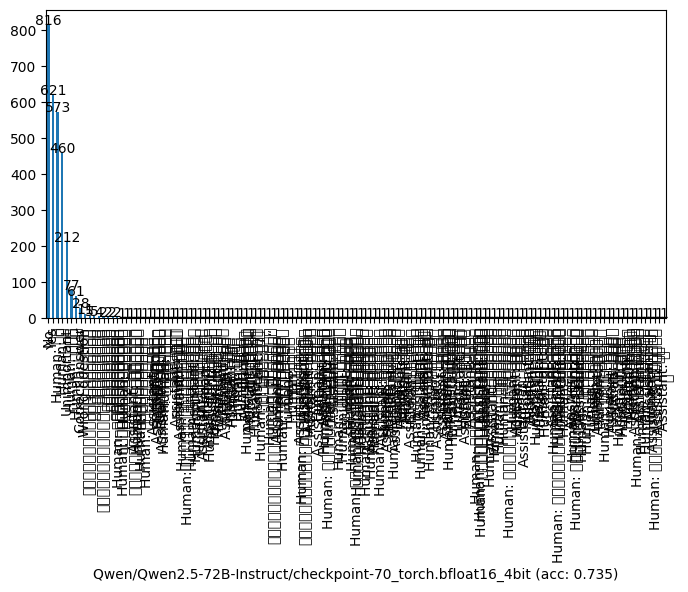

********** Qwen/Qwen2.5-72B-Instruct/checkpoint-105_torch.bfloat16_4bit **********
Qwen/Qwen2.5-72B-Instruct/checkpoint-105_torch.bfloat16_4bit
不是                                 813
是                                  637
Human: 不是                          566
Human: 是                           456
不重要                                205
                                  ... 
Human: 它是动物  \nAssistant: 是          1
Human: 他自己结束了生命。\nAssistant: 不是      1
Human: 他受到了袭击吗？\nAssistant: 不是       1
Human: 他的背包是被自己打翻了吗？\n回答: 是          1
Human: 不是  \nAssistant: 是            1
Name: count, Length: 104, dtype: int64


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38382 (\N{CJK UNIFIED IDEOGRAPH-95EE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27861 (\N{CJK UNIFIED IDEOGRAPH-6CD5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

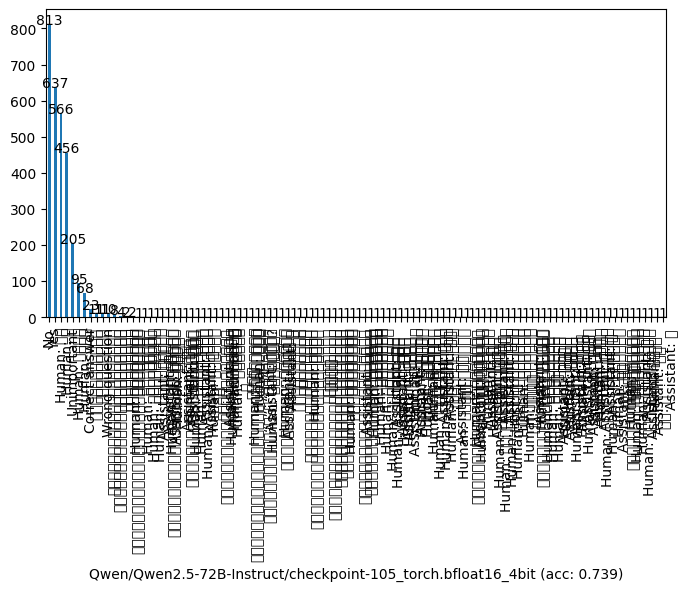

In [15]:
for col, accuracy in zip(df.columns[5:], perf_df["accuracy"].to_list()):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col, title=f"{col} (acc: {accuracy:.3f})")

In [16]:
text = """Human: 他想抓住这个动物
Assistant: 不是

根据谜"""
extract_answer_from_text(text, "他想抓住这个动物")

'不是'

In [17]:

def extract_answer_from_qwen2_5_72b(row, col):
    text = row[col]
    question = row["text"]
    return extract_answer_from_text(text, question)

********** Qwen/Qwen2.5-72B-Instruct_torch.bfloat16_4bit **********


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32534 (\N{CJK UNIFIED IDEOGRAPH-7F16}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20889 (\N{CJK UNIFIED IDEOGRAPH-5199}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38169 (\N{CJK UNIFIED IDEOGRAPH-9519}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

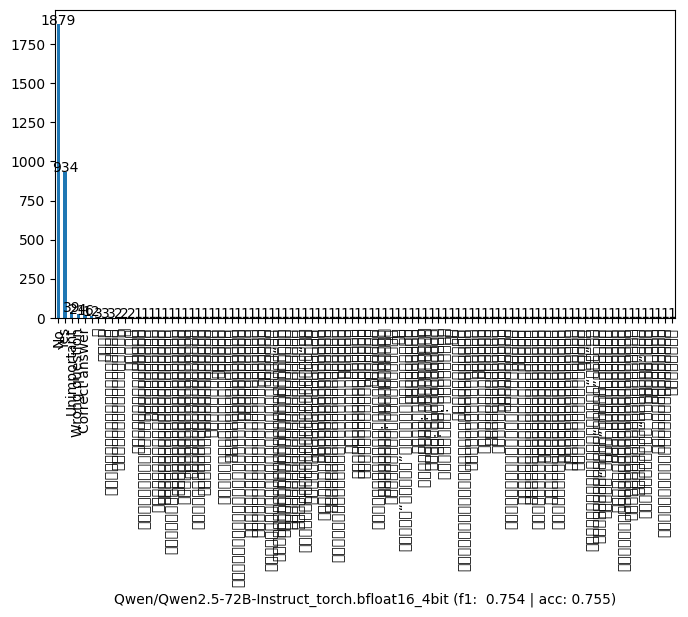

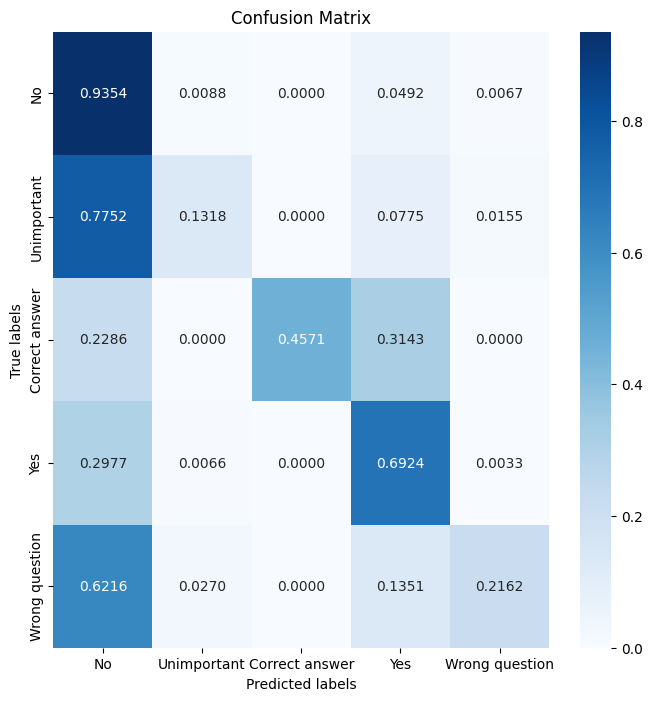

********** Qwen/Qwen2.5-72B-Instruct/checkpoint-35_torch.bfloat16_4bit **********


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35831 (\N{CJK UNIFIED IDEOGRAPH-8BF7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20005 (\N{CJK UNIFIED IDEOGRAPH-4E25}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25353 (\N{CJK UNIFIED IDEOGRAPH-6309}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

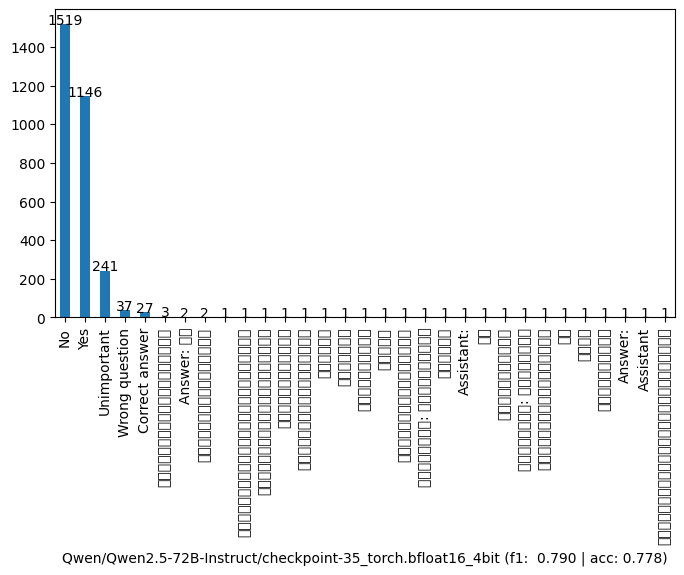

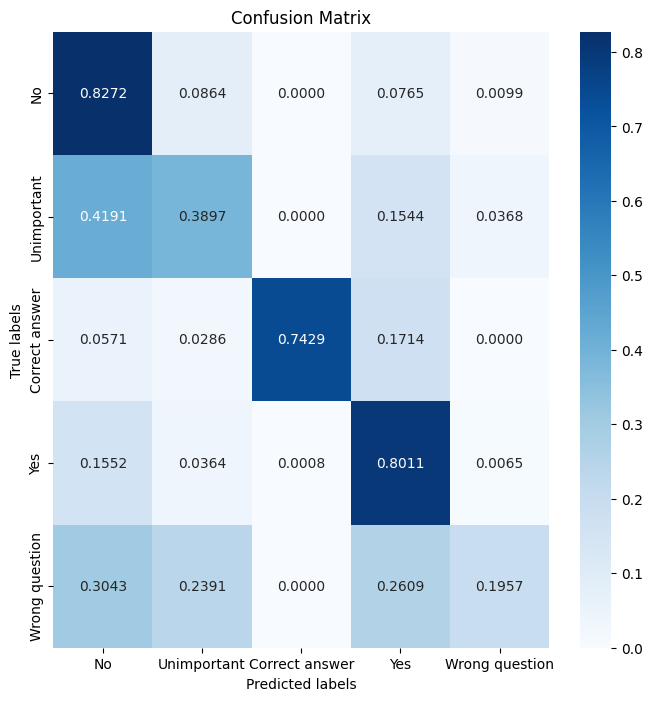

********** Qwen/Qwen2.5-72B-Instruct/checkpoint-70_torch.bfloat16_4bit **********


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35831 (\N{CJK UNIFIED IDEOGRAPH-8BF7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20005 (\N{CJK UNIFIED IDEOGRAPH-4E25}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25353 (\N{CJK UNIFIED IDEOGRAPH-6309}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

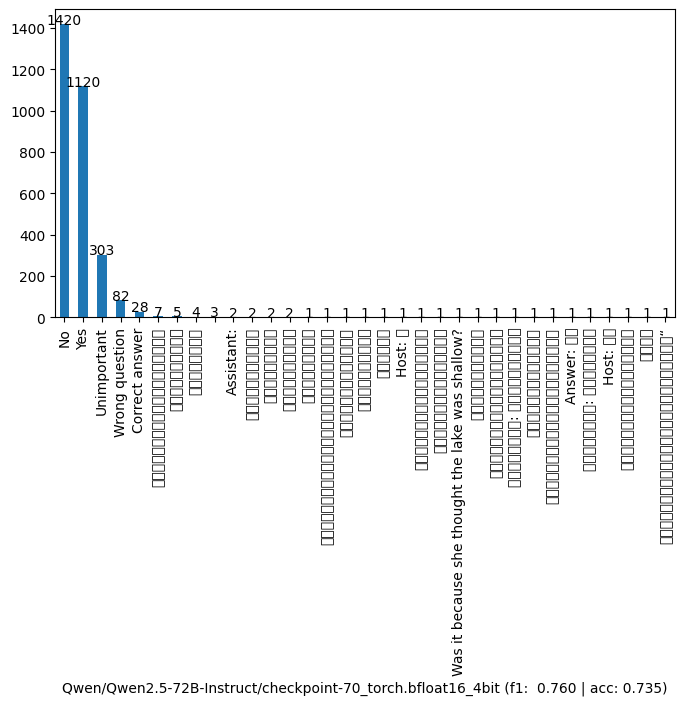

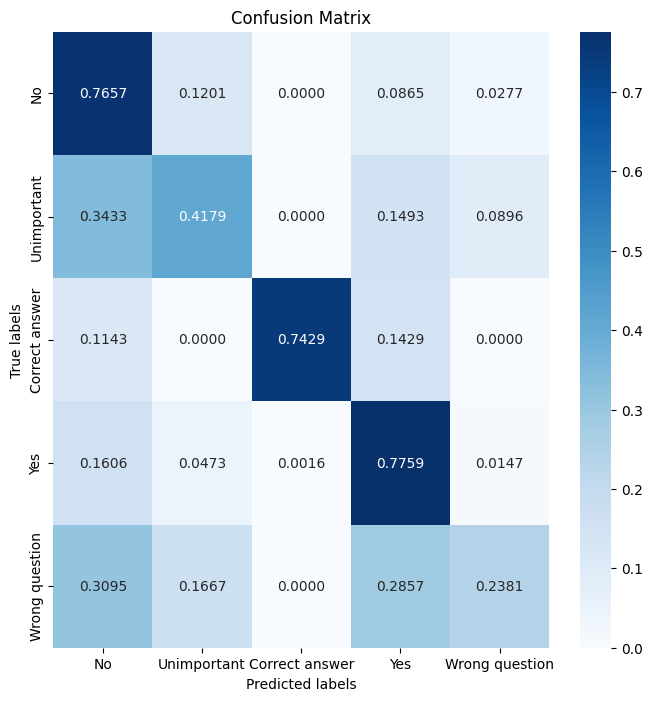

********** Qwen/Qwen2.5-72B-Instruct/checkpoint-105_torch.bfloat16_4bit **********


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35831 (\N{CJK UNIFIED IDEOGRAPH-8BF7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20005 (\N{CJK UNIFIED IDEOGRAPH-4E25}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25353 (\N{CJK UNIFIED IDEOGRAPH-6309}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inflaton/anaconda

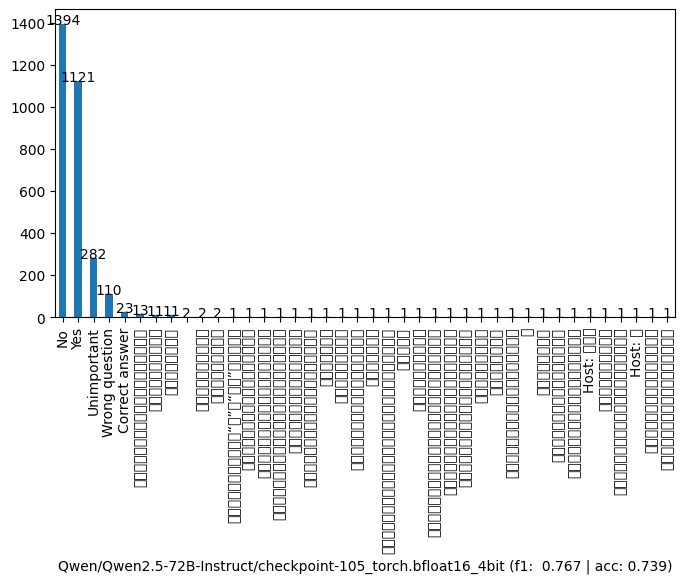

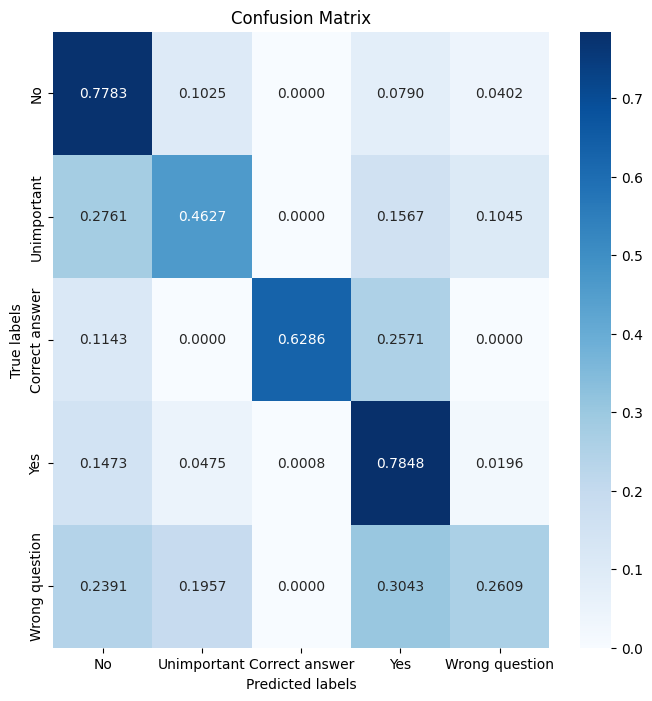

In [18]:
for col, f1, accuracy in zip(
    df.columns[5:], perf_df["f1"].to_list(), perf_df["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    # print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
        preprocess_func=lambda x: extract_answer_from_qwen2_5_72b(x, col),
    )